# **Data Preprocessing**

In [ ]:
! pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 5.9 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: import sample bdf file then viualise the raw data
import mne
import matplotlib.pyplot as plt
raw = mne.io.read_raw_bdf('/content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf', preload=True)


Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...


In [ ]:
print('Shape of the sample data', raw.get_data().shape)

Shape of the sample data (33, 11632640)


In [ ]:
print('info of the sample data', raw.info)

info of the sample data <Info | 8 non-empty values
 bads: []
 ch_names: A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, ...
 chs: 32 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2016-06-07 19:56:07 UTC
 nchan: 33
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


In [ ]:
from glob import glob
import mne
import numpy as np
from scipy import stats
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

def read_data(file_path):
    data = mne.io.read_raw_bdf(file_path, preload=True)
    data.set_eeg_reference()
    # Downsampling
    data.resample(250)
    data.filter(0.5, 25, fir_design='firwin')
    # Segmentation
    epochs = mne.make_fixed_length_epochs(data, duration=5, overlap=0.1)
    array = epochs.get_data()

    # Reshape the data for scaling
    num_samples, num_channels, num_time_points = array.shape
    array_reshaped = array.reshape(num_samples, -1)

    # Apply StandardScaler to the reshaped data
    scaler = StandardScaler()
    array_scaled = scaler.fit_transform(array_reshaped).reshape(array.shape)

    return array

def process_data(filepaths, label):
    epochs_array = []
    epochs_label = []

    for file_path in tqdm(filepaths, desc=f"Processing {label} data"):
        array = read_data(file_path)
        epochs_array.append(array)
        epochs_label.extend([label] * len(array))

    return epochs_array, epochs_label

# Filepaths
haemorrhage_filepaths = glob('/content/drive/MyDrive/GP-Data/Haemorrhage/*.bdf')
ischaemia_filepaths = glob('/content/drive/MyDrive/GP-Data/Ischaemia/*.bdf')
subject_filepaths = glob('/content/drive/MyDrive/GP-Data/Subjects/*.bdf')

# Process data in chunks
chunk_size = 10  # Adjust the chunk size based on your memory constraints

haemorrhage_epochs_array = []
haemorrhage_epochs_label = []
for i in range(0, len(haemorrhage_filepaths), chunk_size):
    chunk_filepaths = haemorrhage_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=0)
    haemorrhage_epochs_array.extend(chunk_array)
    haemorrhage_epochs_label.extend(chunk_label)

ischaemia_epochs_array = []
ischaemia_epochs_label = []
for i in range(0, len(ischaemia_filepaths), chunk_size):
    chunk_filepaths = ischaemia_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=1)
    ischaemia_epochs_array.extend(chunk_array)
    ischaemia_epochs_label.extend(chunk_label)

subject_epochs_array = []
subject_epochs_label = []
for i in range(0, len(subject_filepaths), chunk_size):
    chunk_filepaths = subject_filepaths[i:i + chunk_size]
    chunk_array, chunk_label = process_data(chunk_filepaths, label=2)
    subject_epochs_array.extend(chunk_array)
    subject_epochs_label.extend(chunk_label)

# Concatenate results
data_array = np.vstack(haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array)
label_array = np.hstack(haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label)



Processing 0 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P3_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22496 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2826 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 bad epochs dropped


Processing 0 data:  11%|█         | 1/9 [01:00<08:05, 60.63s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P5_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12058623  =      0.000 ...   736.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2902 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  22%|██▏       | 2/9 [01:55<06:39, 57.06s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P11_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2845 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain des

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  33%|███▎      | 3/9 [02:48<05:31, 55.22s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P6b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2903 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  44%|████▍     | 4/9 [03:36<04:23, 52.67s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P17_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12189695  =      0.000 ...   744.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22483 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2799 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed tim

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  56%|█████▌    | 5/9 [04:25<03:24, 51.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P20_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2862 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  67%|██████▋   | 6/9 [05:13<02:30, 50.20s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed ti

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  78%|███████▊  | 7/9 [06:01<01:38, 49.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P24_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11812863  =      0.000 ...   721.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2886 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-doma

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 0 data:  89%|████████▉ | 8/9 [06:47<00:48, 48.54s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Haemorrhage/P23b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 17498111  =      0.000 ...  1068.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22476 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-dom

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


0 projection items activated
Using data from preloaded Raw for 217 events and 1250 original time points ...
0 bad epochs dropped


Processing 1 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P1_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22488 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2825 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  10%|█         | 1/10 [00:51<07:45, 51.71s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22490 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2823 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  20%|██        | 2/10 [01:39<06:35, 49.49s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22478 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2866 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desig

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  30%|███       | 3/10 [02:26<05:37, 48.23s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P9_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 13107199  =      0.000 ...   800.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [ 65281  65284  65296  65297  65301  65304  65305  65309  65311 130816]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [ 65281  65296  65297  65311 130816]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filt

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  40%|████      | 4/10 [03:17<04:57, 49.54s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11730943  =      0.000 ...   716.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2821 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 5/10 [04:06<04:05, 49.18s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P12b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11763711  =      0.000 ...   718.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2828 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  60%|██████    | 6/10 [04:55<03:16, 49.09s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P15_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22480 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2803 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  70%|███████   | 7/10 [05:42<02:25, 48.35s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P16_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65285 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  80%|████████  | 8/10 [06:33<01:38, 49.33s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22475 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2791 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  90%|█████████ | 9/10 [07:23<00:49, 49.61s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P18_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11681791  =      0.000 ...   713.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2918 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:   0%|          | 0/4 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P19b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22497 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2932 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  25%|██▌       | 1/4 [00:49<02:29, 49.68s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2848 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domai

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  50%|█████     | 2/4 [01:37<01:37, 48.66s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P25b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22486 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2876 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain desi

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 1 data:  75%|███████▌  | 3/4 [02:25<00:48, 48.27s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Ischaemia/P26_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12206079  =      0.000 ...   745.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2864 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/10 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12042239  =      0.000 ...   735.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22474 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2844 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  10%|█         | 1/10 [00:50<07:37, 50.88s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S2a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2895 events found on stim channel Status
Event IDs: [65281 65296 65297 65305]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  20%|██        | 2/10 [01:41<06:44, 50.55s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S1b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12746751  =      0.000 ...   778.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297 65304 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  30%|███       | 3/10 [02:34<06:01, 51.62s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65292 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2802 events found on stim channel Status
Event IDs: [65281 65292 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  40%|████      | 4/10 [03:23<05:04, 50.76s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S3b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11632639  =      0.000 ...   710.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2857 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  50%|█████     | 5/10 [04:12<04:09, 49.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4a_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2800 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-d

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  60%|██████    | 6/10 [04:59<03:16, 49.01s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S4b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2874 events found on stim channel Status
Event IDs: [65281 65296 65297 65301]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  70%|███████   | 7/10 [05:48<02:27, 49.09s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11747327  =      0.000 ...   717.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22481 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2875 events found on stim channel Status
Event IDs: [65281 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  80%|████████  | 8/10 [06:37<01:38, 49.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S5b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65282 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2831 events found on stim channel Status
Event IDs: [65281 65296 65297 65301 65304]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  90%|█████████ | 9/10 [07:26<00:48, 48.97s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11714559  =      0.000 ...   715.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2870 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S6b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22484 events found on stim channel Status
Event IDs: [65281 65284 65289 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2807 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  11%|█         | 1/9 [00:52<07:00, 52.53s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11616255  =      0.000 ...   709.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22473 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2868 events found on stim channel Status
Event IDs: [65281 65284 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  22%|██▏       | 2/9 [01:45<06:08, 52.66s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S7b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11649023  =      0.000 ...   711.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65286 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2883 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  33%|███▎      | 3/9 [02:34<05:07, 51.19s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11698175  =      0.000 ...   714.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22477 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2917 events found on stim channel Status
Event IDs: [65281 65282 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  44%|████▍     | 4/9 [03:23<04:10, 50.11s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S8b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11960319  =      0.000 ...   730.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65294 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2854 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  56%|█████▌    | 5/9 [04:13<03:20, 50.14s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12419071  =      0.000 ...   758.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22485 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2867 events found on stim channel Status
Event IDs: [65281 65296 65297]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


0 bad epochs dropped


Processing 2 data:  67%|██████▋   | 6/9 [05:02<02:29, 49.77s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10a_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11665407  =      0.000 ...   712.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22479 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2884 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  78%|███████▊  | 7/9 [05:55<01:41, 50.92s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S9b_TD2.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 12795903  =      0.000 ...   781.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22482 events found on stim channel Status
Event IDs: [65281 65284 65295 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2885 events found on stim channel Status
Event IDs: [65281 65288 65296 65297 65309]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data:  89%|████████▉ | 8/9 [06:50<00:52, 52.07s/it]

Extracting EDF parameters from /content/drive/MyDrive/GP-Data/Subjects/S10b_TD1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 11599871  =      0.000 ...   708.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
22489 events found on stim channel Status
Event IDs: [65281 65284 65296 65297 65301 65304 65305 65309 65311]
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
2920 events found on stim channel Status
Event IDs: [65281 65296 65297 65311]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
Processing 2 data: 100%|██████████| 9/9 [07:40<00:00, 51.15s/it]


In [ ]:
# Combine epoch arrays for different classes into a single list
data_list= haemorrhage_epochs_array + ischaemia_epochs_array + subject_epochs_array
# Combine corresponding labels into a single list
label_list= haemorrhage_epochs_label + ischaemia_epochs_label + subject_epochs_label


# Print the lengths of the combined data and label lists for verification
print(len(data_list),len(label_list))

42 6239


In [ ]:
# Create a list of groups, where each group corresponds to a class and has the same length as its respective data
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [ ]:
# Stack the data, labels, and groups into numpy arrays
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
# Move the axis to make the data suitable for input into a deep learning model (assuming a time series problem)
data_array=np.moveaxis(data_array,1,2)

# Print the shapes of the resulting arrays
print(data_array.shape,label_array.shape,group_array.shape)

(6239, 1250, 33) (6239,) (6239,)


In [ ]:
# save scaled data
np.save('/content/drive/MyDrive/GP-Data/data_array_renad.npy', data_array)
np.save('/content/drive/MyDrive/GP-Data/label_array_renad.npy', label_array)
np.save('/content/drive/MyDrive/GP-Data/group_array_renad.npy', group_array)


# **Model Creation**

In [ ]:
!pip install imblearn

In [2]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')

print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [3]:
# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one
label_array = label_array.astype('int')
label_array[label_array==0] = 1 #Stroke
label_array[label_array==2] = 0 #Healthy

In [26]:
# prompt: how many instances in each class?

import collections
class_counts = collections.Counter(label_array)
print(class_counts)

x=0
for i in label_array:
  if i == 1:
    x = x +1

print(x)

print(data_array.shape,label_array.shape,group_array.shape)

Counter({1: 4354, 0: 2796})
4354
(7150, 1250, 33) (7150,) (7150,)


In [ ]:
#data_array = data_array.reshape(-1, data_array.shape[-1])

In [18]:
# prompt: split the data into train, validate, test

from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_array, label_array, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(4576, 1250, 33) (4576,)
(1144, 1250, 33) (1144,)
(1430, 1250, 33) (1430,)


In [27]:
print((y_train == 0).sum())
print((y_test == 0).sum())
print((y_val == 0).sum())

1782
557
457


In [28]:
print((y_train == 1).sum())
print((y_test == 1).sum())
print((y_val == 1).sum())

2794
873
687


# **Data Augmentation**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming data_array, label_array, and group_array are defined earlier
print(data_array.shape, label_array.shape, group_array.shape)
# Create a mask for samples where group_array is 0
mask_class_0 = (group_array == 0)

# Separate data for class 0
data_class_0 = data_array[mask_class_0]
label_class_0 = label_array[mask_class_0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_class_0, label_class_0, test_size=0.2, random_state=42)

# Duplicate samples for class 0 to balance the dataset
num_samples_to_duplicate = len(X_train)*3 // len(data_class_0)  # adjust if needed
X_train_resampled = np.repeat(X_train, num_samples_to_duplicate, axis=0)
y_train_resampled = np.repeat(y_train, num_samples_to_duplicate)

# Combine the resampled data with the original data
data_array = np.concatenate((data_array, X_train_resampled), axis=0)
label_array = np.concatenate((label_array, y_train_resampled), axis=0)
group_array = np.concatenate((group_array, np.zeros_like(y_train_resampled)), axis=0)

# Print the final shapes of the arrays
print(data_array.shape, label_array.shape, group_array.shape)


(7150, 1250, 33) (7150,) (7150,)
(7392, 1250, 33) (7392,) (7392,)


In [ ]:
print(num_samples_to_duplicate)

2


In [ ]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)

In [ ]:
# Split data_array into train and validate
train_groups = []
for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_label = data_array[train_index],label_array[train_index]
    val_features, val_labels = data_array[val_index],label_array[val_index]
    train_groups = group_array[train_index]
    scaler=StandardScaler3D()
    train_features=scaler.fit_transform(train_features)
    val_features=scaler.transform(val_features)
    break

# Split train_features into train and test
for train_index, test_index in gkf.split(train_features, train_label, groups= train_groups):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    test_features,test_labels=data_array[test_index],label_array[test_index]

    break

In [10]:
# data spliting percentage
train_p = train_features.shape[0]/data_array.shape[0]
test_p = test_features.shape[0]/data_array.shape[0]
val_p = val_features.shape[0]/data_array.shape[0]

print(f'train_p: {train_p}, test_p: {test_p}, val_p: {val_p}')

print("total: ",train_p + test_p + val_p)

NameError: name 'test_features' is not defined

# **CNN Model**

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#resource:https://github.com/dll-ncai/eeg_pre-diagnostic_screening/blob/master/code/chrononet/chrono.py

In [22]:
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(X_train, y_train, epochs=70, batch_size=132, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/70
35/35 [==============================] - 8s 141ms/step - loss: 0.6744 - accuracy: 0.5999 - val_loss: 0.6781 - val_accuracy: 0.5962
Epoch 2/70
35/35 [==============================] - 1s 41ms/step - loss: 0.6562 - accuracy: 0.6147 - val_loss: 0.6739 - val_accuracy: 0.5927
Epoch 3/70
35/35 [==============================] - 1s 40ms/step - loss: 0.6419 - accuracy: 0.6198 - val_loss: 0.6730 - val_accuracy: 0.5944
Epoch 4/70
35/35 [==============================] - 1s 40ms/step - loss: 0.6269 - accuracy: 0.6333 - val_loss: 0.6719 - val_accuracy: 0.5953
Epoch 5/70
35/35 [==============================] - 1s 40ms/step - loss: 0.6106 - accuracy: 0.6562 - val_loss: 0.6713 - val_accuracy: 0.5970
Epoch 6/70
35/35 [==============================] - 1s 40ms/step - loss: 0.5902 - accuracy: 0.6823 - val_loss: 0.6598 - val_accuracy: 0.6075
Epoch 7/70
35/35 [==============================] - 1s 41ms/step - loss: 0.5643 - accuracy: 0.7157 - val_loss: 0.6414 - val_accuracy: 0.6294
Epoch 8/70
3

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict on test data
y_pred = hist.model.predict(X_test)

# Convert probabilities to binary predictions
#y_pred_binary = [int(round(p[0])) for p in y_pred]


#y_pred = hist.model.predict(test_features)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
f1_score = f1_score(y_test, y_pred_binary)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)

45/45 [==============================] - 1s 20ms/step
Accuracy: 0.948951048951049
Recall: 0.9599083619702177
Precision: 0.95662100456621
F1-score: 0.9582618639222414


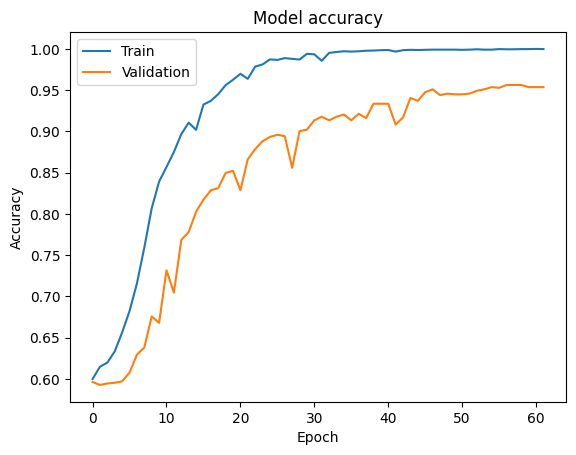

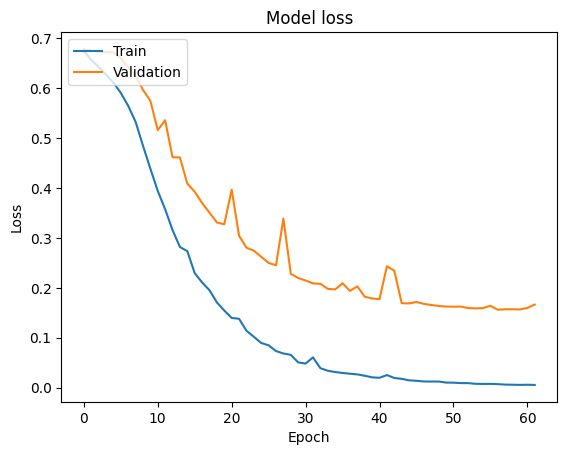

In [29]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Average Confusion Matrix:
45/45 [==============================] - 0s 6ms/step


<Figure size 800x600 with 0 Axes>

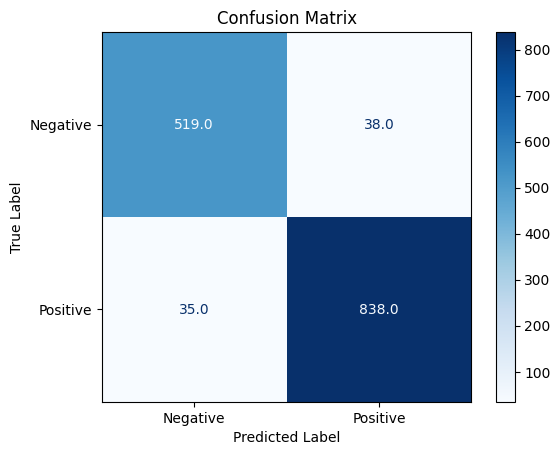

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       557
           1       0.96      0.96      0.96       873

    accuracy                           0.95      1430
   macro avg       0.95      0.95      0.95      1430
weighted avg       0.95      0.95      0.95      1430



In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

In [30]:
# prompt: save and reload the model

hist.model.save('/content/drive/MyDrive/GP_Models/CNN.h5')
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/GP-Data/CNN_RNN.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


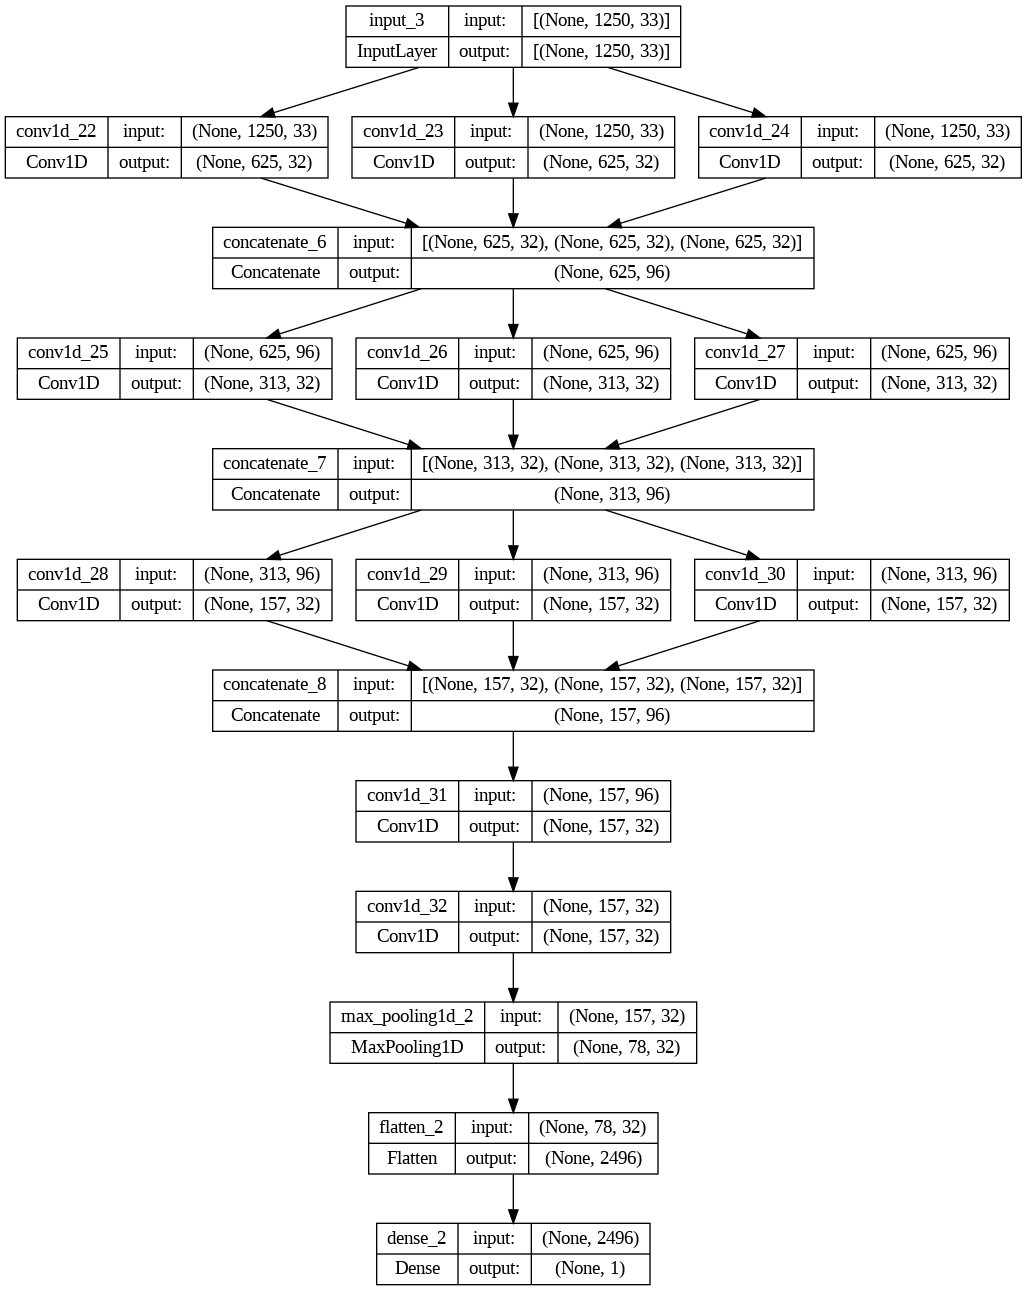

In [32]:
# prompt: print image of the model architecture and save it

from tensorflow.keras.utils import plot_model

# Save the model architecture to a file
plot_model(loaded_model, to_file='/content/drive/MyDrive/GP_Models/CNN.png', show_shapes=True)




# **CNN-RNN Model**

In [ ]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')

print(data_array.shape,label_array.shape,group_array.shape)

# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one
label_array = label_array.astype('int')
label_array[label_array==0] = 1 #Stroke
label_array[label_array==2] = 0 #Healthy



KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
gkf=GroupKFold()
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.preprocessing import StandardScaler
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)


# Split data_array into train and validate
train_groups = []
for train_index, val_index in gkf.split(data_array, label_array, groups=group_array):
    train_features, train_label = data_array[train_index],label_array[train_index]
    val_features, val_labels = data_array[val_index],label_array[val_index]
    train_groups = group_array[train_index]
    scaler=StandardScaler3D()
    train_features=scaler.fit_transform(train_features)
    val_features=scaler.transform(val_features)
    break

# Split train_features into train and test
for train_index, test_index in gkf.split(train_features, train_label, groups= train_groups):
    train_features,train_labels=data_array[train_index],label_array[train_index]
    test_features,test_labels=data_array[test_index],label_array[test_index]

    break


# data spliting percentage
train_p = train_features.shape[0]/data_array.shape[0]
test_p = test_features.shape[0]/data_array.shape[0]
val_p = val_features.shape[0]/data_array.shape[0]

print(f'train_p: {train_p}, test_p: {test_p}, val_p: {val_p}')

print("total: ",train_p + test_p + val_p)


In [12]:
def block(input):

  """
    Create a block consisting of three parallel convolutional layers followed by concatenation.

    Parameters:
    - input: Input tensor.

    Returns:
    - Concatenated tensor resulting from the parallel convolutional layers.
    """

  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x

  # Define the input layer with a shape of (1250, 33)
input = Input(shape=(1250, 33))

  # Create the first block
block1 = block(input)

  # Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

  # Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(gru_out4)

# Define the model with 'input' as the input and 'predictions' as the output
model = Model(inputs=input, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(train_features, train_labels, epochs=50, batch_size=132, validation_data=(val_features, val_labels), callbacks=early_stopping)

NameError: name 'train_labels' is not defined

In [ ]:
# prompt: calculate accuracy, recall, precision, and F1-score of my model "hist"

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict on test data
y_pred = hist.model.predict(test_features)

# Convert probabilities to binary predictions
#y_pred_binary = [int(round(p[0])) for p in y_pred]


#y_pred = hist.model.predict(test_features)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision, and F1-score
accuracy = accuracy_score(test_labels, y_pred_binary)
recall = recall_score(test_labels, y_pred_binary)
precision = precision_score(test_labels, y_pred_binary)
f1_score = f1_score(test_labels, y_pred_binary)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
cm = confusion_matrix(test_labels, y_pred_binary)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# prompt: save and reload the model

hist.model.save('/content/drive/MyDrive/GP_Models/CNN_RNN.h5')
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/GP-Data/CNN_RNN.h5')

# **LSTM Model**

In [ ]:
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

def block(input):
    lstm1 = LSTM(32, activation='tanh', return_sequences=True)(input)
    lstm2 = LSTM(32, activation='tanh', return_sequences=True)(lstm1)
    lstm_out = concatenate([lstm1, lstm2], axis=2)
    return lstm_out

# Assuming train_labels and val_labels are 1-dimensional arrays
train_labels = np.expand_dims(train_labels, axis=-1)
val_labels = np.expand_dims(val_labels, axis=-1)

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

# Use another LSTM layer for sequence processing
lstm_out = LSTM(32, activation='tanh', return_sequences=True)(block3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(lstm_out)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(train_features, train_labels, epochs=10, batch_size=132, validation_data=(val_features, val_labels), callbacks=[early_stopping])


Epoch 1/10
36/36 [==============================] - 215s 6s/step - loss: 0.6770 - accuracy: 0.6735 - val_loss: 0.6608 - val_accuracy: 0.6815
Epoch 2/10
36/36 [==============================] - 195s 5s/step - loss: 0.6090 - accuracy: 0.7295 - val_loss: 0.6381 - val_accuracy: 0.6854
Epoch 3/10
36/36 [==============================] - 194s 5s/step - loss: 0.5827 - accuracy: 0.7321 - val_loss: 0.6263 - val_accuracy: 0.6855
Epoch 4/10
36/36 [==============================] - 191s 5s/step - loss: 0.5791 - accuracy: 0.7321 - val_loss: 0.6257 - val_accuracy: 0.6855
Epoch 5/10
36/36 [==============================] - 188s 5s/step - loss: 0.5756 - accuracy: 0.7322 - val_loss: 0.6205 - val_accuracy: 0.6856
Epoch 6/10
36/36 [==============================] - 193s 5s/step - loss: 0.5701 - accuracy: 0.7328 - val_loss: 0.6068 - val_accuracy: 0.6882
Epoch 7/10
36/36 [==============================] - 191s 5s/step - loss: 0.5600 - accuracy: 0.7362 - val_loss: 0.5918 - val_accuracy: 0.6968
Epoch 8/10
36

In [ ]:
# prompt: calculate accuracy, recall, precision, and F1-score of my model "hist"

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Predict on test data
y_pred = hist.model.predict(test_features)

# Convert probabilities to binary predictions
#y_pred_binary = [int(round(p[0])) for p in y_pred]


#y_pred = hist.model.predict(test_features)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy, recall, precision, and F1-score
accuracy = accuracy_score(test_labels, y_pred_binary)
recall = recall_score(test_labels, y_pred_binary)
precision = precision_score(test_labels, y_pred_binary)
f1_score = f1_score(test_labels, y_pred_binary)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1-score:", f1_score)

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
cm = confusion_matrix(test_labels, y_pred_binary)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

33/33 [==============================] - 23s 677ms/step


ValueError: Classification metrics can't handle a mix of binary and unknown targets

# **LSTM-CNN Model**

In [ ]:
from keras.layers import Input, Conv1D, concatenate, Dense, Flatten, MaxPooling1D, LSTM
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def block(input):
    lstm1 = LSTM(32, return_sequences=True, activation='relu')(input)
    lstm2 = LSTM(32, return_sequences=True, activation='relu')(input)
    lstm3 = LSTM(32, return_sequences=True, activation='relu')(input)
    x = concatenate([lstm1, lstm2, lstm3], axis=2)
    return x

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
model = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = model.fit(train_features, train_labels, epochs=50, batch_size=132, validation_data=(val_features, val_labels), callbacks=[early_stopping])


Epoch 1/50
36/36 [==============================] - 131s 3s/step - loss: nan - accuracy: 0.2758 - val_loss: nan - val_accuracy: 0.3145
Epoch 2/50
 5/36 [===>..........................] - ETA: 1:32 - loss: nan - accuracy: 0.2394

KeyboardInterrupt: 